# Linear Operators

Finite dimensional linear operators allow matrix algebra without explicitly constructing a full representation. Instead it suffices to define a matrix-vector product and a shape attribute. This avoids unnecessary memory usage and can often be more convenient to derive.

## Sparse Arrays

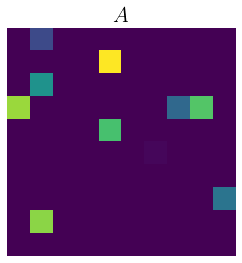

In [10]:
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [9.5, 6]
plt.rcParams['font.size'] = 18 
plt.rcParams['text.usetex'] = True
# Imports
import numpy as np
import scipy.sparse
from probnum.linalg.linear_operators import MatrixMult, Identity

# Linear operator from sparse matrix
n = 10
mat = scipy.sparse.rand(m=n, n=n, density=0.1)
A = MatrixMult(A=mat)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
axes.imshow(A.todense())
axes.set_axis_off()
axes.title.set_text('$A$')
fig.tight_layout()

## Basic Arithmetic

In [2]:
Id = Identity(shape=n)
B = A + Id
print(B.todense())

AttributeError: '_SumLinearOperator' object has no attribute 'todense'

## The Kronecker Product

[[ 4. 16.  1.  4.  4. 16.]
 [ 2.  8.  3. 12.  2.  8.]]


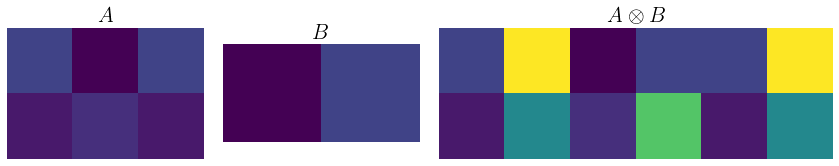

In [33]:
from probnum.linalg.linear_operators import Kronecker, SymmetricKronecker

# Kronecker Product
A = np.array([[4, 1, 4], 
              [2, 3, 2]])
B = np.array([[1, 4]])
W = Kronecker(A=A, B=B)
print(W_dense)

# in order to plot both heatmaps on the same scale, find the plotting range
W_dense = W.todense()
vmin = np.minimum(np.min(A), np.min(B))
vmin = np.minimum(np.min(W_dense), vmin)
vmax = np.maximum(np.max(A), np.max(B))
vmax = np.maximum(np.max(W_dense), vmax)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), gridspec_kw={'width_ratios': [1, 1, 2]})
axes[0].imshow(A, vmin=vmin, vmax=vmax)
axes[0].set_axis_off()
axes[0].title.set_text('$A$')
axes[1].imshow(B, vmin=vmin, vmax=vmax)
axes[1].set_axis_off()
axes[1].title.set_text('$B$')
axes[2].imshow(W_dense, vmin=vmin, vmax=vmax)
axes[2].set_axis_off()
axes[2].title.set_text('$A \otimes B$')
fig.tight_layout()

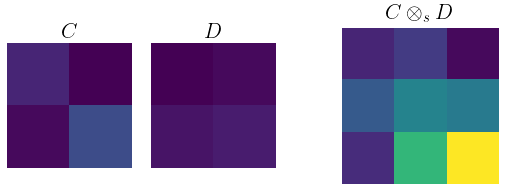

In [31]:
# Symmetric Kronecker Product
C = np.array([[5, 1], 
              [2, 10]])
D = np.array([[1, 2], 
              [3, 4]])
Ws = SymmetricKronecker(A=C, B=D)

# in order to plot both heatmaps on the same scale, find the plotting range
Ws_dense = Ws.todense()
vmin = np.minimum(np.min(C), np.min(D))
vmin = np.minimum(np.min(Ws_dense), vmin)
vmax = np.maximum(np.max(C), np.max(D))
vmax = np.maximum(np.max(Ws_dense), vmax)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), gridspec_kw={'width_ratios': [1, 1, 2]})
axes[0].imshow(C, vmin=vmin, vmax=vmax)
axes[0].set_axis_off()
axes[0].title.set_text('$C$')
axes[1].imshow(D, vmin=vmin, vmax=vmax)
axes[1].set_axis_off()
axes[1].title.set_text('$D$')
axes[2].imshow(Ws_dense, vmin=vmin, vmax=vmax)
axes[2].set_axis_off()
axes[2].title.set_text('$C \otimes_s D$')
fig.tight_layout()

## Linear Operators and Linear Solvers

Many methods implemented in `probnum.linalg` can also take `LinearOperators` as inputs.